# Data Visualization for the Car details dataset

## Importing the standard libraries and the dataset

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('./assets/car-details-for-visualization.csv')
dataset_encoded = pd.read_csv('./assets/car-details-for-visualization-encoded.csv')

Confirming the dataset is available and correct:

In [3]:
dataset.head()

,brand,year,km_driven,fuel,transmission,seller_type,owner,seats,mileage,engine,max_power,nm,selling_price
0,Maruti,2014,145500,Diesel,Manual,Individual,First Owner,5.0,23.40,1248,74.00,190.00,450000
1,Skoda,2014,120000,Diesel,Manual,Individual,Second Owner,5.0,21.14,1498,103.52,250.00,370000
2,Honda,2006,140000,Petrol,Manual,Individual,Third Owner,5.0,17.70,1497,78.00,124.54,158000
3,Hyundai,2010,127000,Diesel,Manual,Individual,First Owner,5.0,23.00,1396,90.00,219.67,225000
4,Maruti,2007,120000,Petrol,Manual,Individual,First Owner,5.0,16.10,1298,88.20,112.78,130000


### Visualizing the correlation between features

In [4]:
price_mean = dataset['selling_price'].mean()
price_median = dataset['selling_price'].median()

print('Mean:', price_mean)
print('Median:', price_median)

Mean: 580414.3782268579
Median: 450000.0


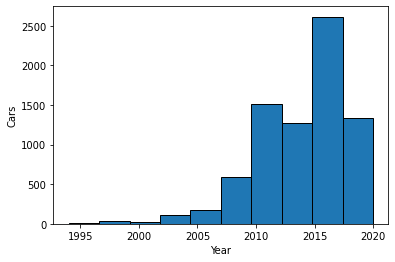

In [5]:
plt.hist(dataset["year"], edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Cars")
plt.show()

Most cars seem to be of newer sort

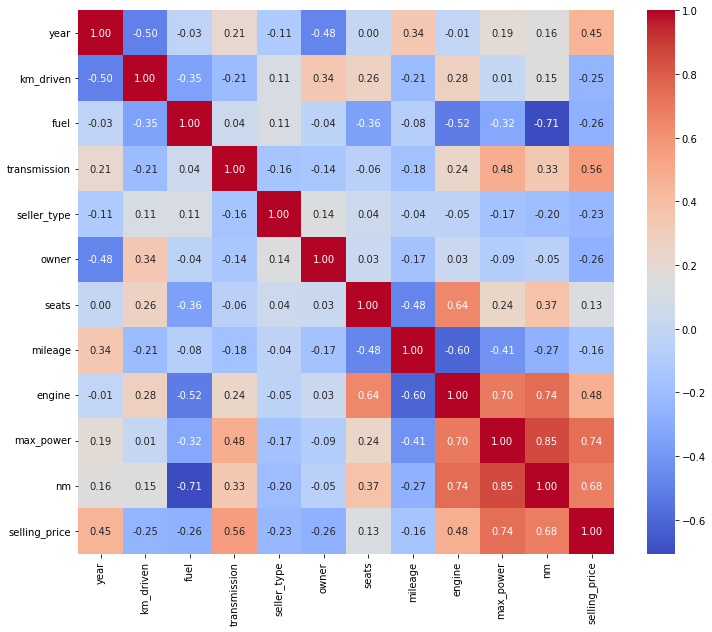

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(dataset_encoded.corr(), annot=True, fmt='.2f', cbar=True, cmap='coolwarm')
plt.show()

Seeing this heatmap helps visualize the relationship between the selling price and other features.

Not having done this, I would have believed a feature like km_driven and mileage would be a lot more correlated with the selling price.

The features that seem important for the selling price is year, transmission, engine, max_power and nm.

Looking at the big picture that also makes sense, because cars that produce more power are usually more expensive. However, the other features are not to be counted out yet.

## Visualization in relation of sales price

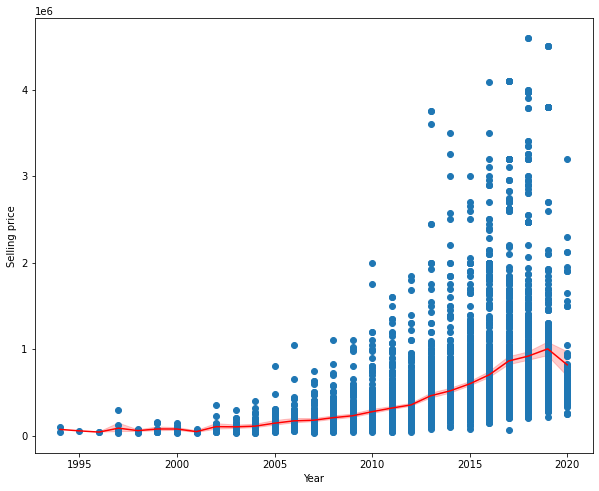

In [7]:
plt.figure(figsize=(10, 8))
plt.ylabel("Selling price")
plt.xlabel("Year")
sns.lineplot(x="year", y="selling_price", data=dataset, color='red')
plt.scatter(dataset['year'], dataset['selling_price'])
plt.show()


There seems to be a linear growth in the selling price the newer the car is, as expected up until 2019. For some reason it drops in 2020. (Could be pandemic related)

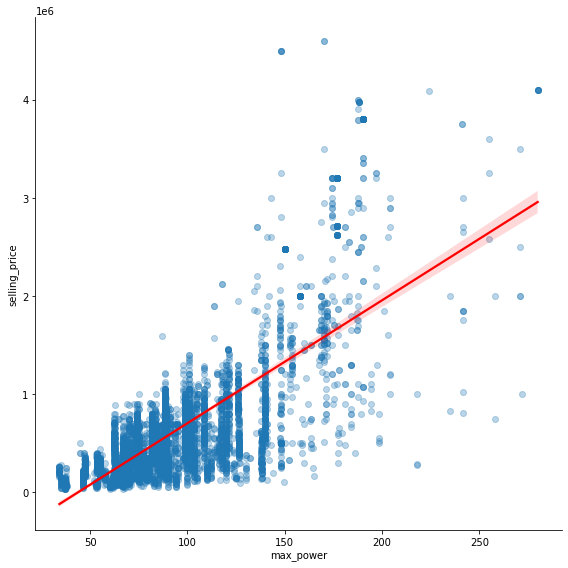

In [8]:
sns.lmplot(x="max_power", y="selling_price", data=dataset, scatter_kws={"alpha" : 0.3}, line_kws={"color" : "red"}, height=8)
plt.show()


The HP (max_power) to selling price ratio also seems to be a linear relationship. I won't do for nm and engine, since they will yield about the same result.

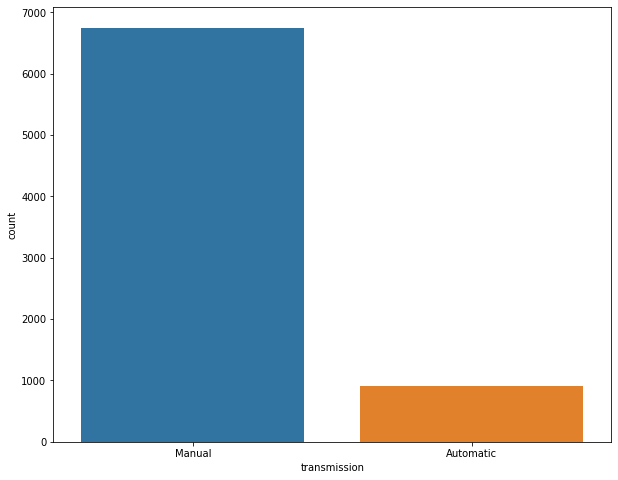

In [9]:
plt.figure(figsize=(10, 8))
sns.countplot(x="transmission", data=dataset)
plt.show()

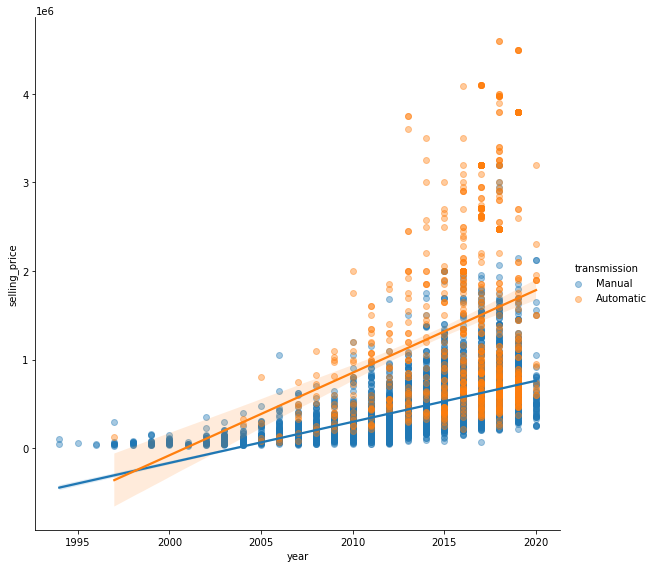

In [10]:
sns.lmplot(x="year", y="selling_price", data=dataset, hue="transmission", scatter_kws={"alpha" : 0.4}, height=8)
plt.show()

Automatic transmissions seem to be affect the sales price more than manual transmissions

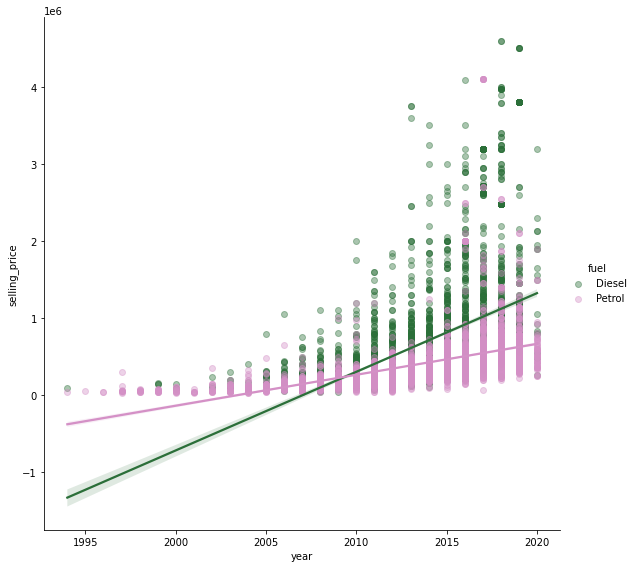

In [11]:
sns.lmplot(x="year", y="selling_price", data=dataset, hue="fuel", scatter_kws={"alpha" : 0.4, }, height=8, palette="cubehelix")
plt.show()

Diesel engines seem to be more expensive than petrol. I assume this is because of the mileage and price of the fuel type. This will also be useful for classification between diesel and petrol.

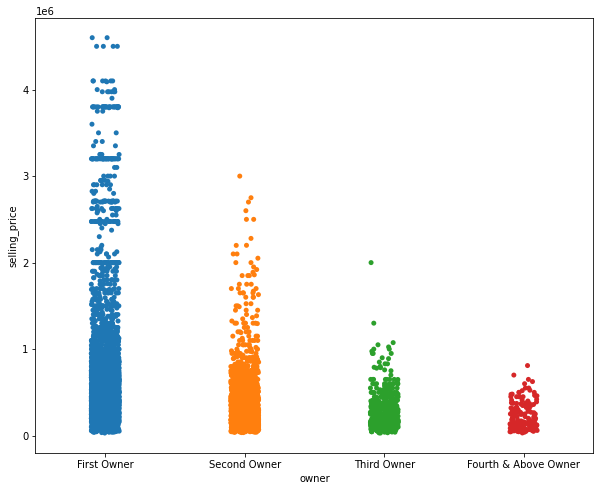

In [12]:
plt.figure(figsize=(10, 8))
sns.stripplot(y="selling_price", x="owner", data=dataset)
plt.show()

Cars that only have had 1 owner seem to be the most expensive. As soon as they are on to the 2nd owner they drastically drop in price then onwards.

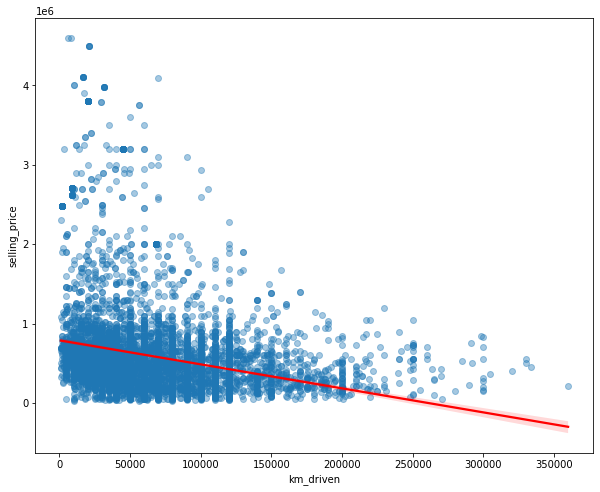

In [13]:
plt.figure(figsize=(10, 8))
sns.regplot(x="km_driven", y="selling_price", data=dataset, scatter_kws={"alpha" : 0.4}, line_kws={"color" : "red"})
plt.show()

Cars that have driven less are the most expensive as expected. The more they have driven the more they lose linearly in value.

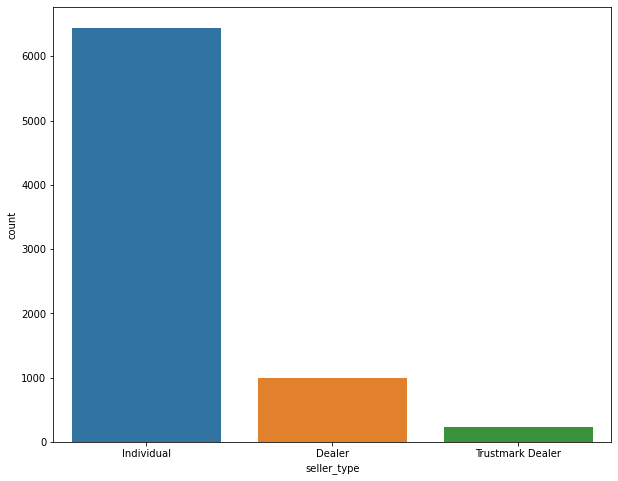

In [14]:
plt.figure(figsize=(10, 8))
sns.countplot(x="seller_type", data=dataset)
plt.show()

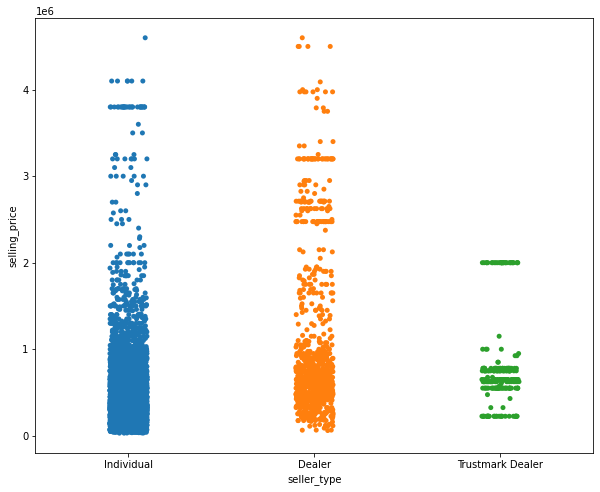

In [15]:
plt.figure(figsize=(10, 8))
sns.stripplot(y="selling_price", x="seller_type", data=dataset)
plt.show()

A lot of private sales in this dataset. However dealers seem to have more expensive sales. 

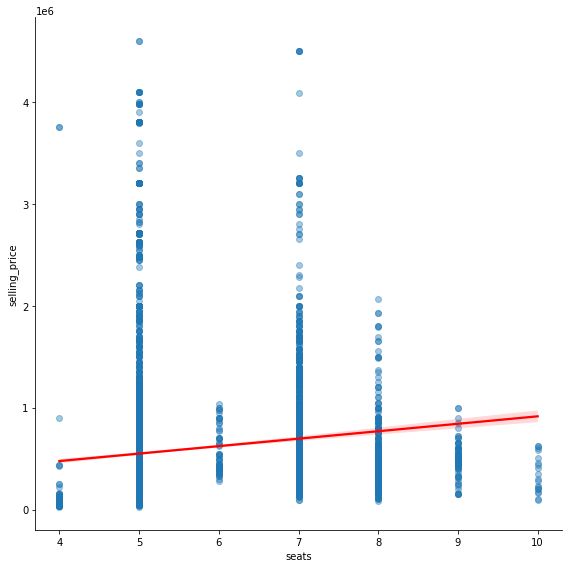

In [16]:
sns.lmplot(x="seats", y="selling_price", data=dataset, scatter_kws={"alpha" : 0.4}, height=8, line_kws={"color" : "red"})
plt.show()

The amount of seats in a car seems to have a small linear relationship with the selling price in a positive fashion.

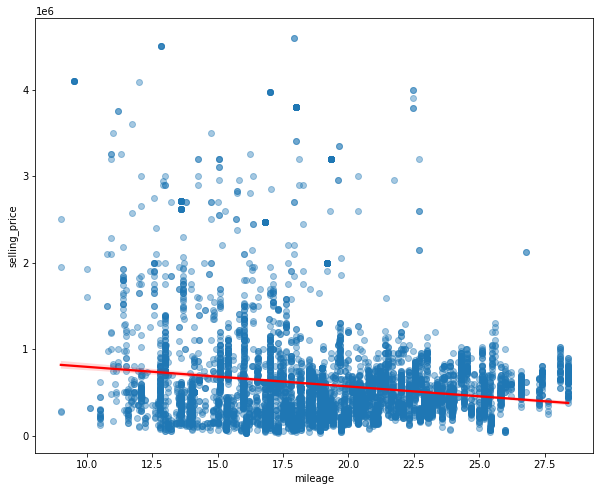

In [17]:
plt.figure(figsize=(10, 8))
sns.regplot(x="mileage", y="selling_price", data=dataset, scatter_kws={"alpha" : 0.4}, line_kws={"color" : "red"})
plt.show()

Higher mileage (km/l) cars seem to be less expensive. I assume this is because cars with a certain fuel type is sought after.

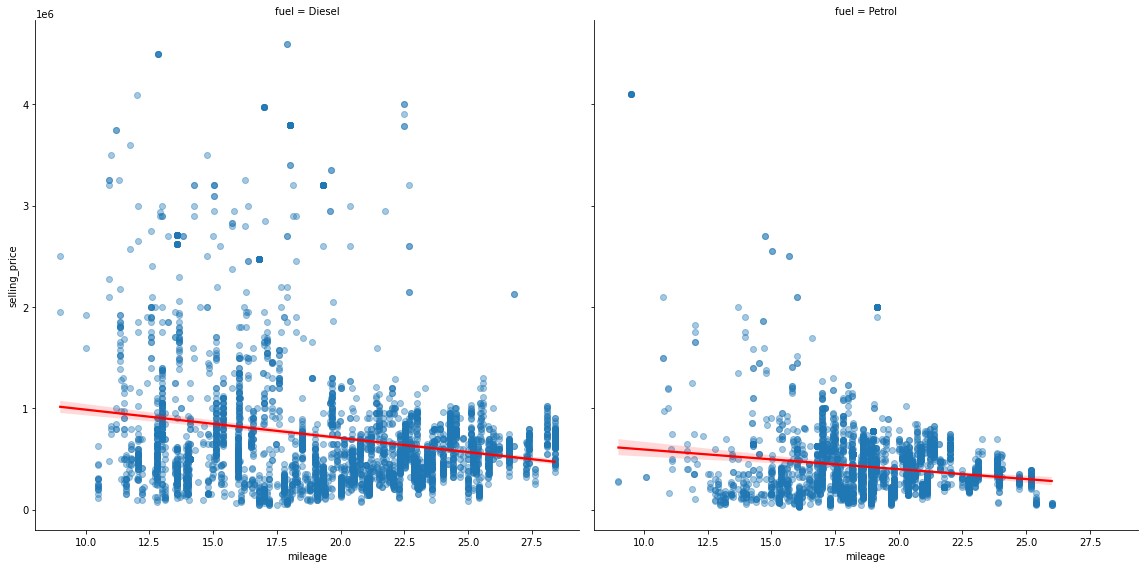

In [18]:
sns.lmplot(x="mileage", y="selling_price", col="fuel", data=dataset, scatter_kws={"alpha" : 0.4}, line_kws={"color" : "red"}, height=8)
plt.show()

My first intuition seems to be wrong. I then assume it is because cars with bigger engines are more expensive, and bigger engines lead to worse mileage.

**And lastly** let's see how the selling price is related to the brand of the car.

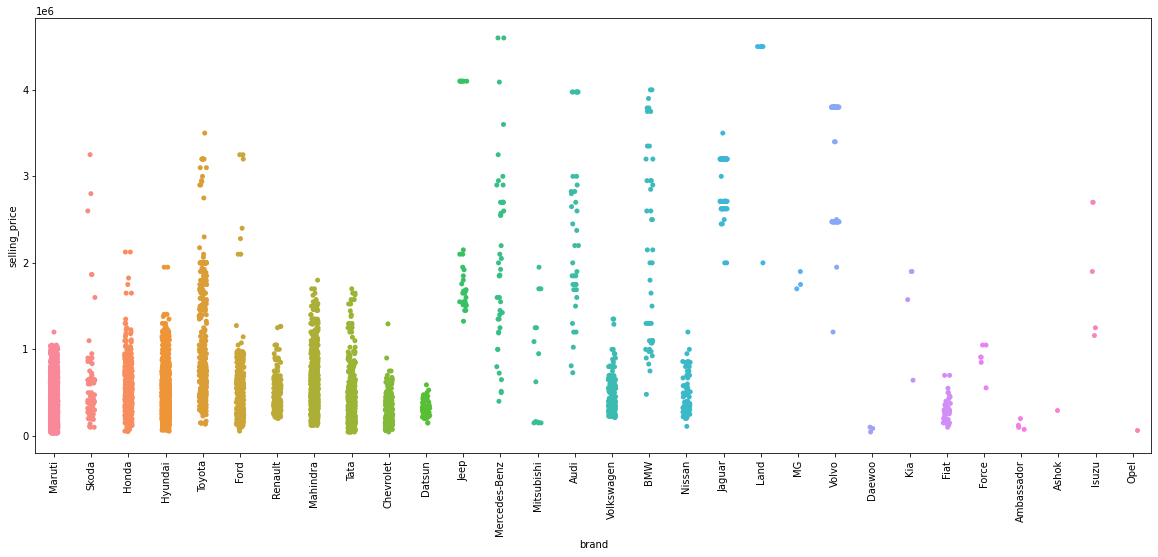

In [19]:
plt.figure(figsize=(20, 8))
sns.stripplot(y="selling_price", x="brand", data=dataset)
plt.xticks(rotation=90)
plt.show()

Mercedes seems to be the most expensive brand in this dataset. Closely followed by Land Rover and Jeep.

### Summary of visualization in relation to the selling price

Having gained a lot of information from the visualizations, such as the linear relationship between the features and the selling price. However, some of the features might not all have a linear relationship? I will need to check this. Refer to the model selection notebook under the selling_price directory.

## Visualization in relation of fuel types

The important features that are directly correlated with the fuel type are km_driven, seats?, engine, max_power, selling price and especially nm. Let's see how they are related by visualizing them.

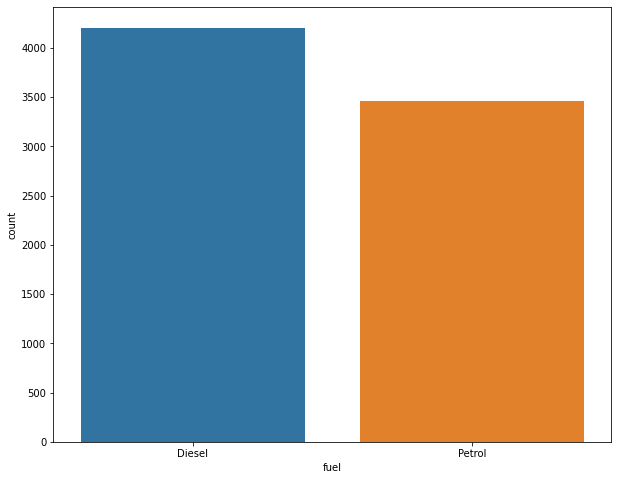

In [20]:
plt.figure(figsize=(10, 8))
sns.countplot(x="fuel", data=dataset)
plt.show()

The spread of the fuel types seem to be quite similar. With the amount of diesel cars just a little bit higher than petrol cars.

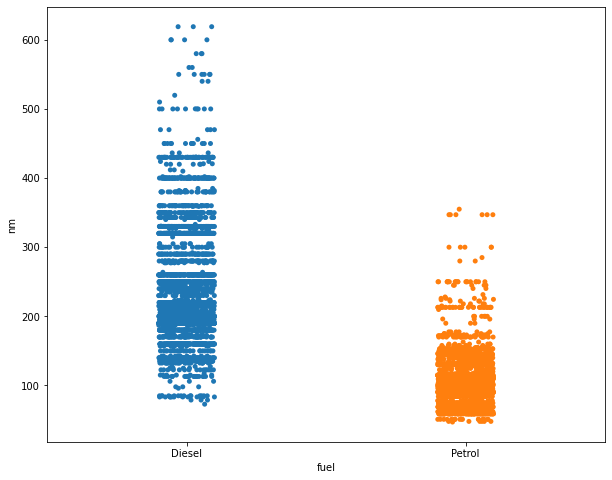

In [21]:
plt.figure(figsize=(10, 8))
sns.stripplot(y="nm", x="fuel", data=dataset)
plt.show()

On average, diesel cars hare more torque than petrol cars. This will come handy during classification.

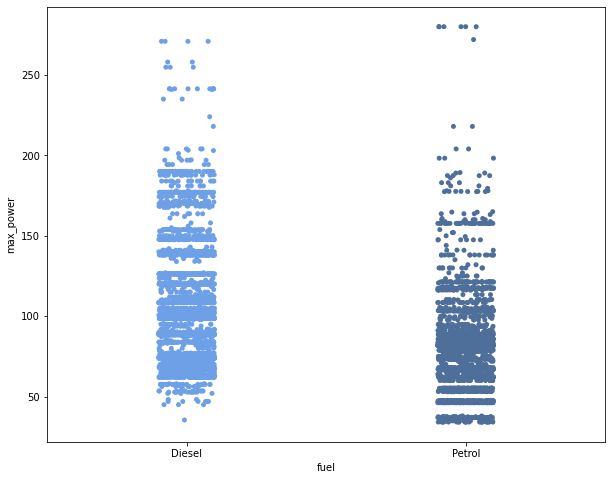

In [22]:
plt.figure(figsize=(10, 8))
sns.stripplot(y="max_power", x="fuel", data=dataset, palette=(sns.diverging_palette(250, 30, l=65, center="dark")))
plt.show()

Again on average diesel cars have more power than petrol cars, however petrol cars have the most power.

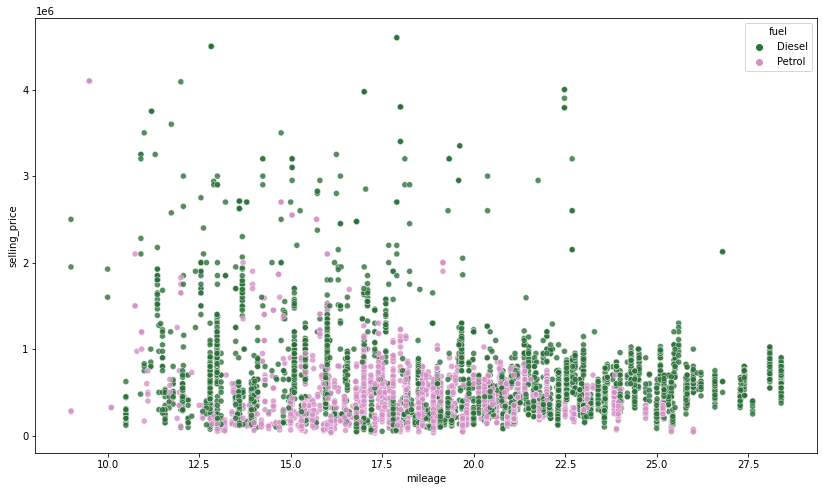

In [23]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x="mileage", y="selling_price", data=dataset, hue="fuel", palette="cubehelix", alpha=0.8)
plt.show()

Diesel cars seem dominant in this figure having the most cars in the higher price range as well as highest amount of mileage.

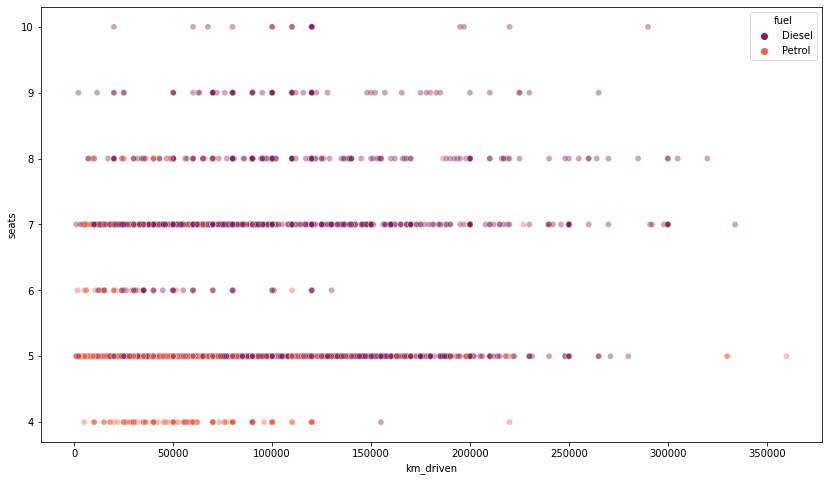

In [24]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x="km_driven", y="seats", hue="fuel", data=dataset, palette="rocket", alpha=0.4)
plt.show()

Diesel cars seem to be the only ones above 7 seats in the dataset. They for the most part also have the most km_driven.

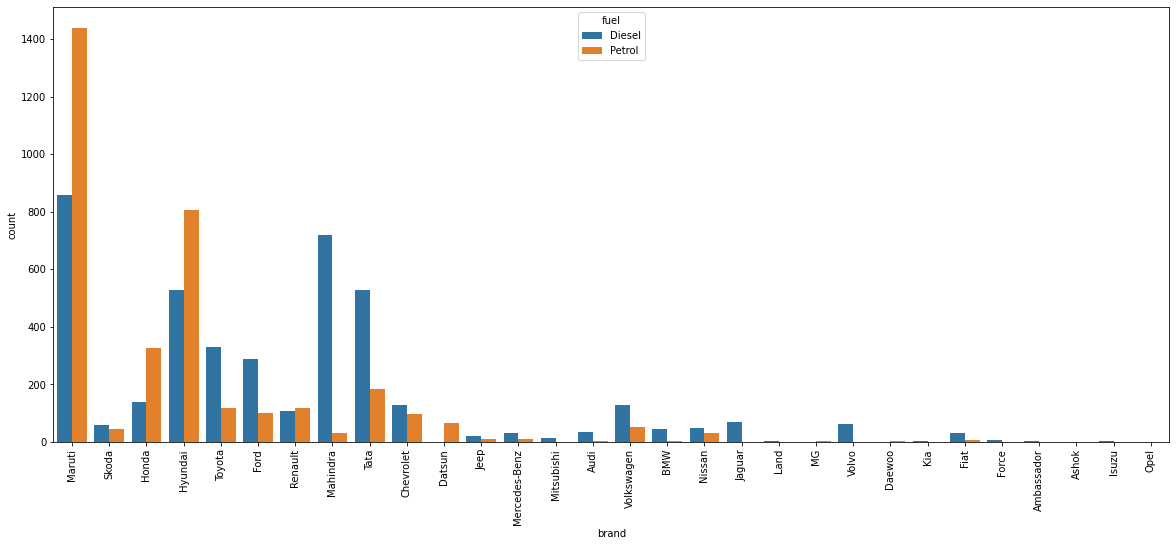

In [25]:
plt.figure(figsize=(20, 8))
sns.countplot(x="brand", hue="fuel", data=dataset)
plt.xticks(rotation=90)
plt.show()

This figure shows how many cars are either petrol or diesel by brand name. This surely will also help the classification process.

### Summary of visualization in relation to the fuel types

By visualizing the fuel types, I can see that it can be classified from the independent variables. Features such as km_driven, seats, nm, max_power and mileage are all closely related to the fuel type, and together they can be used to classify the fuel type without knowing beforehand. Now it's time to select the most efficient model for the task. Refer to the model selection notebook under the fuel_type directory.